# Project 1 - Predictict Compressive strenth of concrete for various combinations

In [147]:
# Importing Python Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [65]:
### Importring Concrete Data
concrete_data= pd.read_csv('D:/Data_Science/Board Infinity/Session 14022021/Project1/Project - 1 Data (Concrete Data).csv')

In [66]:
concrete_data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [67]:
concrete_data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Feature Engineering

In [68]:
### Performing feature engineering on the basis of EDA which done in excel.

### Handling Missing Values 

In [69]:
# Checking no of rows & columns in data
concrete_data.shape

(1030, 9)

In [70]:
# Checking no. of missing values are in variable

In [71]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_in_days                    1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [72]:
concrete_data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_in_days                      0
Concrete_compressive_strength    0
dtype: int64

In [73]:
### No Missing Values in Data Set.

## Handling Duplicate values

In [74]:
concrete_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [75]:
### No Duplicate value in Given dataset

## Hnadling Outliers 

In [76]:
concrete_data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_in_days',
       'Concrete_compressive_strength'],
      dtype='object')

In [77]:
# Age Feature have highest Outlier. Removing outlier of age column.
concrete_data1 = concrete_data[(concrete_data['Age_in_days'] < 180)]

In [78]:
concrete_data1.shape

(971, 9)

In [79]:
# Removing outlier of Water column.
concrete_data1 = concrete_data1[(concrete_data['Water'] < 236.7) & (concrete_data['Water'] > 121.8)]

<ipython-input-79-8d6f30754133>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  concrete_data1 = concrete_data1[(concrete_data['Water'] < 236.7) & (concrete_data['Water'] > 121.8)]


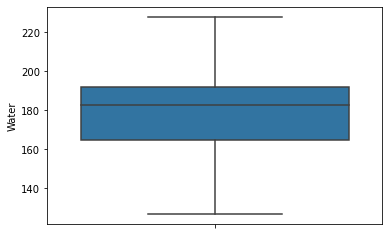

In [80]:
sns.boxplot(y='Water',data=concrete_data1)

In [81]:
# Otliers Removed from data by removing rows.

## Splitting data into Feature variable & Target variable

In [82]:
X = concrete_data1.drop(['Concrete_compressive_strength'],axis=1)

In [83]:
y = concrete_data1['Concrete_compressive_strength']

In [84]:
X = X.drop(['Fly_Ash'],axis=1)

In [85]:
X.head()

,Cement,Blast_Furnace_Slag,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days
0,540.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,228.0,0.0,932.0,670.0,28


In [86]:
X.shape

(962, 7)

## Splitting Data Set into Training & Testing

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

## Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
std_scaler = StandardScaler()

In [91]:
std_scaler.fit(X_train)

StandardScaler()

In [92]:
#Transforming training data set
X_train= std_scaler.transform(X_train)

In [93]:
#Transforming testing data set
X_test= std_scaler.transform(X_test)

## Building Model

## Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
# HyperTuning Random Forest Regressor with n_estimators
RFR_train_score=[]
RFR_test_score=[]
n_estimator = [2,3,4,5,6,7,8,9,10,11]
for n in n_estimator:
    rf_regressor = RandomForestRegressor(n_estimators=n,random_state=21)
    rf_regressor.fit(X_train,y_train)
    RFR_train_score.append(rf_regressor.score(X_train,y_train))
    RFR_test_score.append(rf_regressor.score(X_test,y_test))

<function matplotlib.pyplot.show(*args, **kw)>

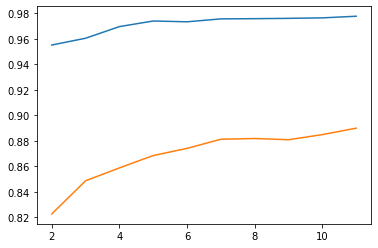

In [139]:
plt.plot(n_estimator,RFR_train_score)
plt.plot(n_estimator,RFR_test_score)
plt.show

In [140]:
# Building Random Forest Regressor model by using n_estimator = 11
rf_regresssor1 = RandomForestRegressor(n_estimators=11,random_state=21)
rf_regresssor1.fit(X_train,y_train)
print("Training Score =")
rf_regresssor1.score(X_train,y_train)

Training Score =


0.9777709892104696

In [141]:
print("Testing Score =")
rf_regresssor1.score(X_test,y_test)

Testing Score =


0.8898802860590511

In [142]:
rfr_concrete_pred = rf_regresssor1.predict(X_test)

In [143]:
#R2 score
RFR_R2_Score = round(r2_score(y_test,rfr_concrete_pred),2)
print("Random Forest Regressor R2 score =")
print(RFR_R2_Score*100)

Random Forest Regressor R2 score =
89.0


In [144]:
# Mean Squared Error
RFR_Mean_Squared_Error = round(mean_squared_error(y_test,rfr_concrete_pred),2)
print("Random Forest Regressor Mean squared error =")
print(RFR_Mean_Squared_Error)

Random Forest Regressor Mean squared error =
29.82


In [149]:
f = open('Concrete_Compressive_strength_prediction.pkl','wb')
pickle.dump(rf_regresssor1, f)
f.close()